In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [4]:
# Load the dataset from the CSV file
file_path = 'creditcards.csv' 
data = pd.read_csv(file_path)

In [5]:
# Check the dataset structure
print(data.head())  

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Prepare the data for anomaly detection
# We will use the 'Amount' column as the feature for anomaly detection
X = data[['Amount']]

In [8]:
# Train the Isolation Forest model
# Set contamination to the expected proportion of anomalies (frauds)
# You can adjust this based on the dataset's fraud rate
contamination = 0.01  # Assuming 1% of transactions are fraudulent
model = IsolationForest(contamination=contamination, random_state=42)

In [9]:
# Predict anomalies (frauds)
import numpy as np
data['AnomalyScore'] = model.fit_predict(X)
data['Anomaly'] = np.where(data['AnomalyScore'] == -1, 1, 0)  # -1 indicates an anomaly

In [10]:
# Evaluate the model
# Compare the detected anomalies with the actual fraud labels
fraud_detected = data[(data['Anomaly'] == 1) & (data['Class'] == 1)].shape[0]
total_frauds = data[data['Class'] == 1].shape[0]
print(f'Frauds detected: {fraud_detected}/{total_frauds}')

Frauds detected: 9/492


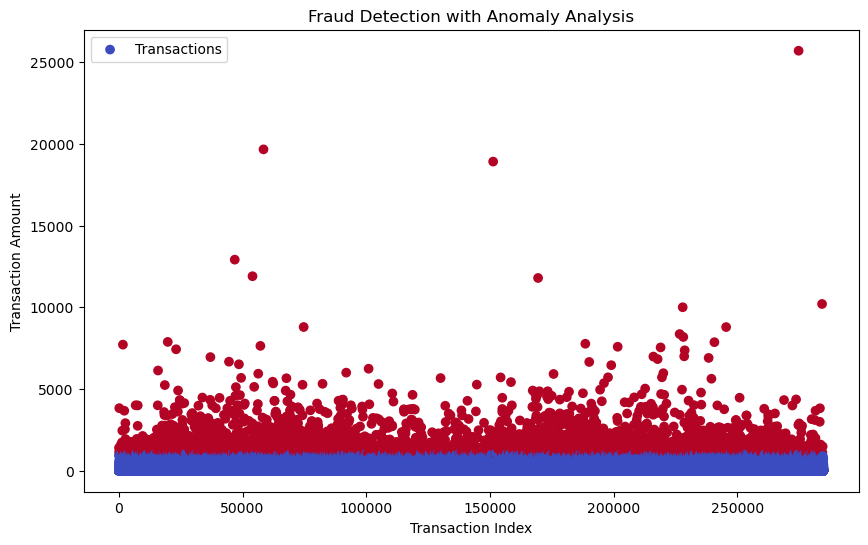

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Amount'], c=data['Anomaly'], cmap='coolwarm', label='Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Fraud Detection with Anomaly Analysis')
plt.legend()
plt.show()

In [12]:
# Show or export detected frauds
frauds = data[data['Anomaly'] == 1]
print(frauds.head())  # display first fraudulent transactions
frauds.to_excel('fraud_transactions.xlsx', index=False)
print("Fraud transactions exported to 'fraud_transactions.xlsx'")


      Time        V1         V2        V3        V4        V5        V6  \
51    36.0 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
89    59.0 -0.773293  -4.146007 -0.932038  0.027094 -1.698307  0.460188   
164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
633  481.0 -2.752124  -3.232168  0.873036  0.108217 -2.451279  0.486159   
865  656.0 -1.789835  -5.835768 -1.472791 -0.851160 -2.433875  0.401415   

           V7        V8        V9  ...       V23       V24       V25  \
51   4.371691 -2.006868 -0.278736  ...  0.969719  0.019445  0.570923   
89   0.737344 -0.314216 -0.842673  ... -1.134769 -0.654958  0.098386   
164  4.808426 -0.228197 -0.525896  ... -3.553381  1.215279 -0.406073   
633  3.152907 -1.013087  1.128326  ...  0.545794  0.853981 -0.943651   
865  1.354543 -0.288283  2.426889  ... -1.635914 -0.645651  0.112930   

          V26       V27       V28   Amount  Class  AnomalyScore  Anomaly  
51   0.333278  0.857373 -0.075538  1402.9